In [250]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib

In [251]:
data = pd.read_csv('/content/house_prices.csv')

In [252]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


# **Data Analysis**

In [253]:
data.shape

(13320, 9)

In [254]:
# examine area type feature
data.groupby('area_type').agg('count')

,availability,location,size,society,total_sqft,bath,balcony,price
area_type,,,,,,,,
Built-up Area,2418,2418,2418,1215,2418,2410,2310,2418
Carpet Area,87,87,87,54,87,87,82,87
Plot Area,2025,2025,2009,311,2025,2009,1837,2025
Super built-up Area,8790,8789,8790,6238,8790,8741,8482,8790


In [255]:
data.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

#**Data Cleaning**

In [256]:
data = data.drop(['society','balcony','availability'],axis='columns')
print(data.shape)

(13320, 6)


In [257]:
data.head()

,area_type,location,size,total_sqft,bath,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00


In [258]:
data.isnull().sum()

area_type      0
location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [259]:
data = data.dropna()
data.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

#**Feature Engineering**

In [260]:
data['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [261]:
data['size'].value_counts()

2 BHK         5198
3 BHK         4286
4 Bedroom      818
4 BHK          577
3 Bedroom      546
1 BHK          531
2 Bedroom      329
5 Bedroom      296
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           57
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [262]:
data['BHK'] = data['size'].apply(lambda x: int(x.split(' ')[0]))
data.BHK.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [263]:
data = data.drop(['size'],axis='columns')

In [264]:
data[data.BHK>15]

,area_type,location,total_sqft,bath,price,BHK
1718,Super built-up Area,2Electronic City Phase II,8000,27.0,230.0,27
3379,Super built-up Area,1Hanuman Nagar,2000,16.0,490.0,19
3609,Super built-up Area,Koramangala Industrial Layout,10000,16.0,550.0,16
4684,Plot Area,Munnekollal,2400,40.0,660.0,43
11559,Plot Area,1Kasavanhalli,1200,18.0,200.0,18


In [265]:
data.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [266]:
# check if number is float or range
def is_float(x):
  try:
    float(x)
  except:
    return False
  return True

In [267]:
data[~data['total_sqft'].apply(is_float)].head()

,area_type,location,total_sqft,bath,price,BHK
30,Super built-up Area,Yelahanka,2100 - 2850,4.0,186.000,4
122,Super built-up Area,Hebbal,3067 - 8156,4.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Super built-up Area,Sarjapur,1145 - 1340,2.0,43.490,2
188,Super built-up Area,KR Puram,1015 - 1540,2.0,56.800,2


In [268]:
~data['total_sqft'].apply(is_float)

0        False
1        False
2        False
3        False
4        False
         ...  
13315    False
13316    False
13317    False
13318    False
13319    False
Name: total_sqft, Length: 13246, dtype: bool

In [269]:
#convert range to single number
def sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None 

In [270]:
sqft_to_num('2000')

2000.0

In [271]:
sqft_to_num('26 - 8')

17.0

In [272]:
data.total_sqft = data.total_sqft.apply(sqft_to_num)
data = data[data.total_sqft.notnull()]
data.head()

,area_type,location,total_sqft,bath,price,BHK
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Built-up Area,Uttarahalli,1440.0,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Super built-up Area,Kothanur,1200.0,2.0,51.00,2


In [273]:
# create a new feature
data['price_per_sqft'] = data['price']*100000/data['total_sqft']
data.head()

<ipython-input-273-d3b88fc607dd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price_per_sqft'] = data['price']*100000/data['total_sqft']


,area_type,location,total_sqft,bath,price,BHK,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,1200.0,2.0,51.00,2,4250.000000


#**Dimensionality Reduction**

In [274]:
len(data['location'].unique())

1298

In [275]:
data.location = data.location.apply(lambda x: x.strip()) # remove unwanted space
location_stats = data.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats[:15]

location
Whitefield                  533
Sarjapur  Road              392
Electronic City             304
Kanakpura Road              264
Thanisandra                 235
Yelahanka                   210
Uttarahalli                 186
Hebbal                      176
Marathahalli                175
Raja Rajeshwari Nagar       171
Bannerghatta Road           151
Hennur Road                 150
7th Phase JP Nagar          148
Haralur Road                141
Electronic City Phase II    131
Name: location, dtype: int64

In [276]:
# decrease number of location columns
# Any location having less than 10 data points is tagged as "other" location, to reduce number of categories

loc_stats_less10 = location_stats[location_stats<=15]
len(loc_stats_less10)

1107

In [277]:
data.location = data.location.apply(lambda x: 'other' if x in loc_stats_less10 else x)
data[90:100]

,area_type,location,total_sqft,bath,price,BHK,price_per_sqft
92,Super built-up Area,other,1450.0,2.0,70.0,3,4827.586207
93,Plot Area,other,1200.0,4.0,155.0,4,12916.666667
94,Super built-up Area,Thanisandra,1296.0,2.0,80.0,2,6172.839506
95,Super built-up Area,Domlur,1540.0,3.0,90.0,3,5844.155844
96,Plot Area,Kengeri,2894.0,4.0,245.0,4,8465.791292
97,Super built-up Area,Sarjapura - Attibele Road,1330.0,2.0,48.0,3,3609.022556
98,Built-up Area,other,1200.0,2.0,65.0,2,5416.666667
99,Built-up Area,other,1200.0,3.0,90.0,3,7500.000000
100,Super built-up Area,Yeshwanthpur,2502.0,3.0,138.0,3,5515.587530
101,Built-up Area,Chandapura,650.0,1.0,17.0,2,2615.384615


In [278]:
len(data['location'].unique())

181

#**Outlier Removal Using Business Logic**

according to business manager, what are the common sizes 

In [279]:
data[data.total_sqft/data.BHK<300].head()

,area_type,location,total_sqft,bath,price,BHK,price_per_sqft
9,Plot Area,other,1020.0,6.0,370.0,6,36274.509804
45,Plot Area,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Plot Area,other,1407.0,4.0,150.0,6,10660.980810
68,Plot Area,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.296296
70,Plot Area,other,500.0,3.0,100.0,3,20000.000000


In [280]:
data.shape

(13200, 7)

In [281]:
len(data[(data.total_sqft/data.BHK<300)])

744

In [282]:
data.price_per_sqft.describe()

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [283]:
# remove outliers Using Standard Deviation and Mean
def remove_outliers(data):
    data_out = pd.DataFrame()
    for key, subdata in data.groupby('location'):
        m = np.mean(subdata.price_per_sqft)
        st = np.std(subdata.price_per_sqft)
        reduced_data = subdata[(subdata.price_per_sqft>(m-st)) & (subdata.price_per_sqft<=(m+st))]
        data_out = pd.concat([data_out,reduced_data],ignore_index=True)
    return data_out
data = remove_outliers(data)
data.shape

(11636, 7)

**Data Visualisation**

In [284]:
data['location'].unique()

array(['1st Phase JP Nagar', '2nd Stage Nagarbhavi', '5th Phase JP Nagar',
       '6th Phase JP Nagar', '7th Phase JP Nagar', '8th Phase JP Nagar',
       '9th Phase JP Nagar', 'Abbigere', 'Akshaya Nagar', 'Ambalipura',
       'Ambedkar Nagar', 'Amruthahalli', 'Anandapura', 'Ananth Nagar',
       'Anekal', 'Anjanapura', 'Ardendale', 'Arekere', 'Attibele',
       'BTM 2nd Stage', 'BTM Layout', 'Babusapalaya', 'Balagere',
       'Banashankari', 'Banashankari Stage II', 'Banashankari Stage III',
       'Banashankari Stage VI', 'Banaswadi', 'Bannerghatta',
       'Bannerghatta Road', 'Basavangudi', 'Basaveshwara Nagar',
       'Battarahalli', 'Begur', 'Begur Road', 'Bellandur', 'Bhoganhalli',
       'Billekahalli', 'Binny Pete', 'Bisuvanahalli', 'Bommanahalli',
       'Bommasandra', 'Bommasandra Industrial Area', 'Brookefield',
       'Budigere', 'CV Raman Nagar', 'Chandapura', 'Channasandra',
       'Chikka Tirupathi', 'Chikkalasandra', 'Choodasandra', 'Cooke Town',
       'Dasanapura', '

In [285]:
def plot_scatter_chart(data,location):
    BHK3 = data[(data.location==location) & (data.BHK==3)]
    matplotlib.rcParams['figure.figsize'] = (10,10)
    plt.scatter(BHK2.total_sqft,BHK2.price,color='blue',label='2 BHK', s=20)
    plt.scatter(BHK3.total_sqft,BHK3.price,marker='+', color='green',label='3 BHK', s=20)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

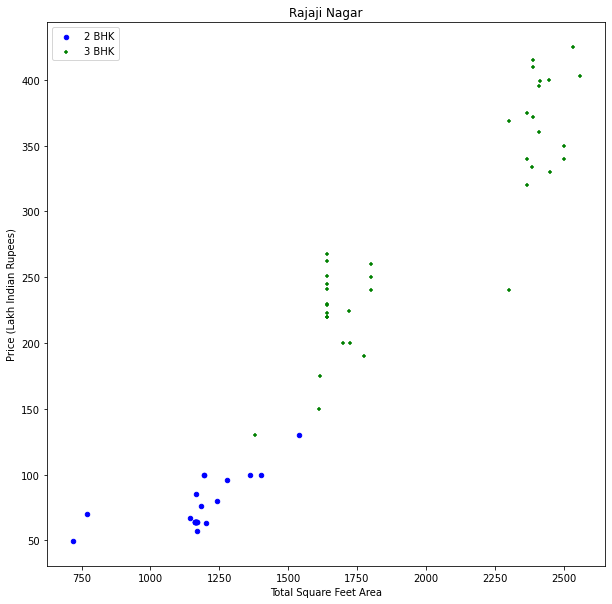

In [286]:
plot_scatter_chart(data,"Rajaji Nagar")

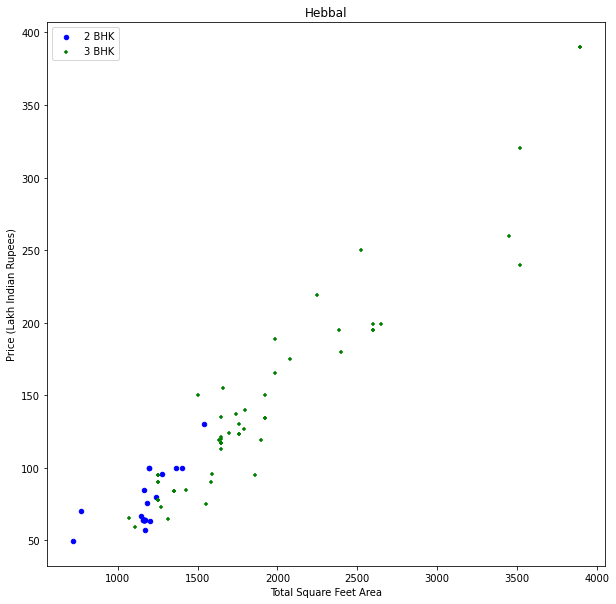

In [287]:
plot_scatter_chart(data,"Hebbal")

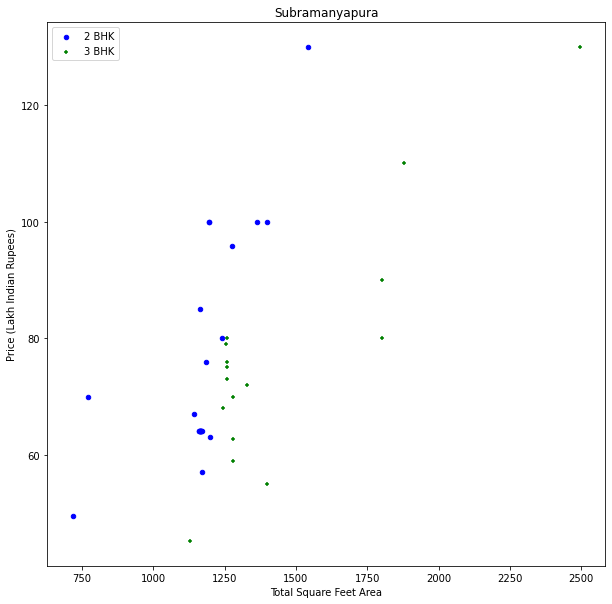

In [288]:
plot_scatter_chart(data,"Subramanyapura")

In [289]:
def remove_BHK_outliers(data):
    exclude_indices = np.array([])
    for location, location_data in data.groupby('location'):
        BHK_stats = {}
        for BHK, BHK_data in location_data.groupby('BHK'):
            BHK_stats[BHK] = {
                'mean': np.mean(BHK_data.price_per_sqft),
                'std': np.std(BHK_data.price_per_sqft),
                'count': BHK_data.shape[0]
            }
        for BHK, BHK_data in location_data.groupby('BHK'):
            stats = BHK_stats.get(BHK-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, BHK_data[BHK_data.price_per_sqft<(stats['mean'])].index.values)
    return data.drop(exclude_indices,axis='index')
data = remove_BHK_outliers(data)
data.shape

(7809, 7)

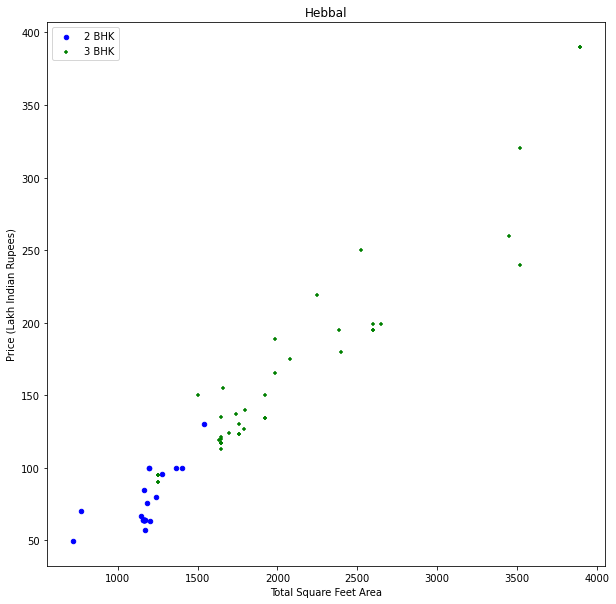

In [290]:
plot_scatter_chart(data,"Hebbal")

Text(0, 0.5, 'Count')

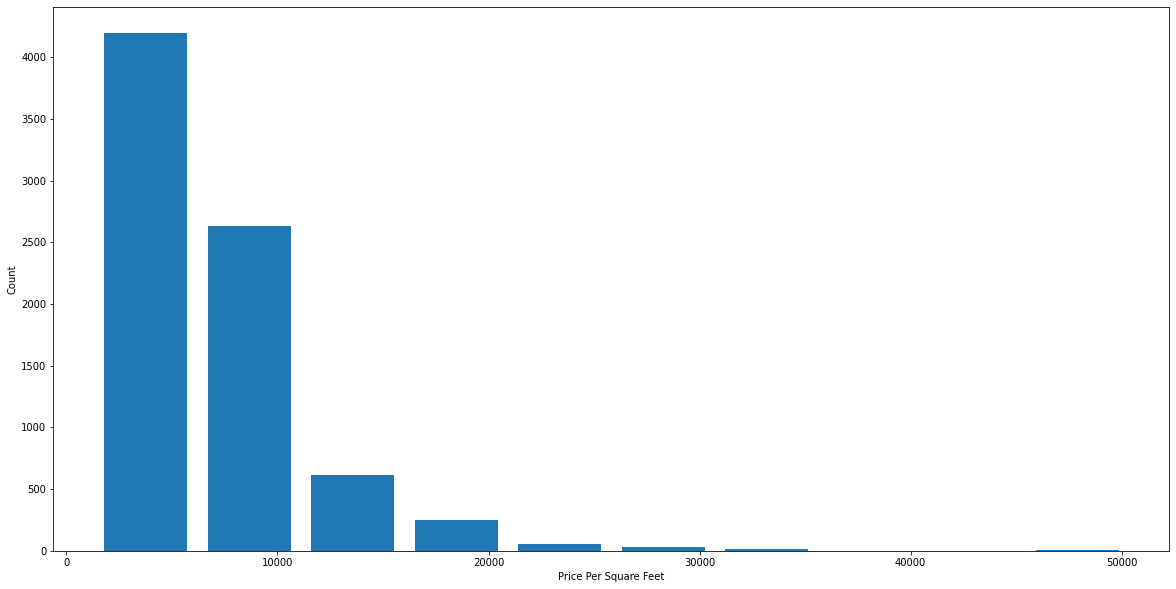

In [291]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(data.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

**Outlier Removal Using Bathrooms Feature**

In [292]:
data.bath.unique()

array([ 3.,  5.,  4.,  2.,  1.,  8.,  6.,  7.,  9., 10., 14., 27., 12.,
       16., 15., 13., 18.])

Text(0, 0.5, 'Count')

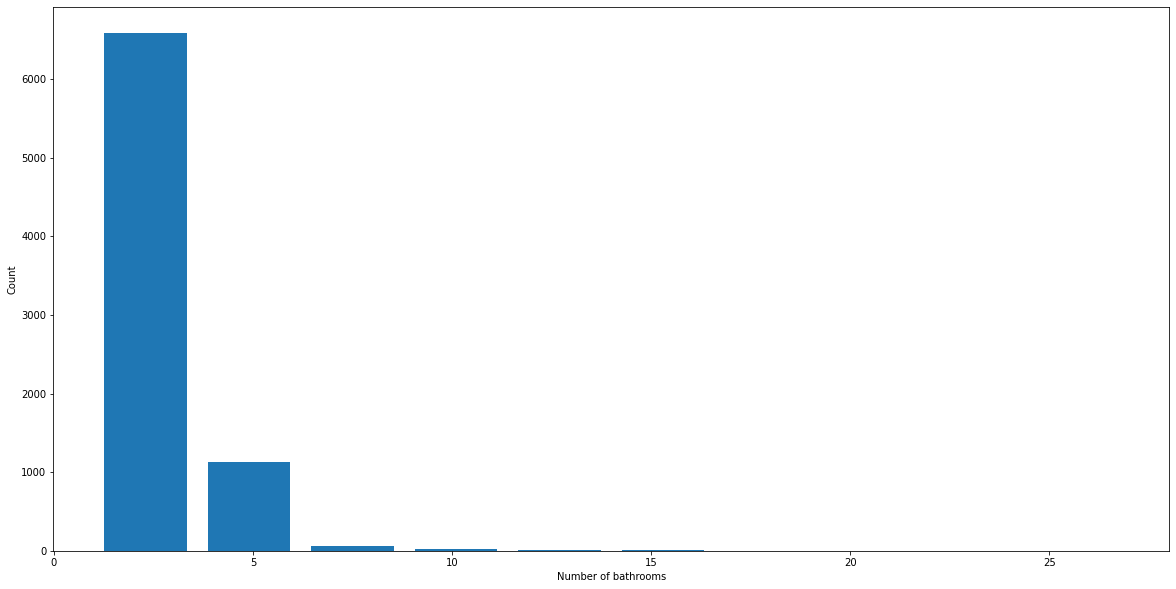

In [293]:
plt.hist(data.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [294]:
data[data.bath>10]

,area_type,location,total_sqft,bath,price,BHK,price_per_sqft
8313,Plot Area,other,3300.0,14.0,500.0,9,15151.515152
8486,Super built-up Area,other,8000.0,27.0,230.0,27,2875.000000
8561,Plot Area,other,990.0,12.0,120.0,8,12121.212121
8923,Super built-up Area,other,2000.0,16.0,490.0,19,24500.000000
8994,Super built-up Area,other,10000.0,16.0,550.0,16,5500.000000
9341,Super built-up Area,other,1250.0,15.0,125.0,14,10000.000000
9886,Plot Area,other,2600.0,12.0,675.0,9,25961.538462
10206,Plot Area,other,1850.0,12.0,300.0,8,16216.216216
10702,Super built-up Area,other,5425.0,13.0,275.0,13,5069.124424
11151,Plot Area,other,1200.0,18.0,200.0,18,16666.666667


In [295]:
# outliers: when bathrooms are more than number of bedrooms +2
data = data[data.bath<data.BHK+2]

In [296]:
data.head()

,area_type,location,total_sqft,bath,price,BHK,price_per_sqft
1,Super built-up Area,1st Phase JP Nagar,1875.0,3.0,167.0,3,8906.666667
2,Built-up Area,1st Phase JP Nagar,1500.0,5.0,85.0,5,5666.666667
3,Super built-up Area,1st Phase JP Nagar,2065.0,4.0,210.0,3,10169.491525
5,Super built-up Area,1st Phase JP Nagar,2059.0,3.0,225.0,3,10927.634774
6,Super built-up Area,1st Phase JP Nagar,1394.0,2.0,100.0,2,7173.601148


In [297]:
data.shape

(7710, 7)

#**Data Preparation**

In [298]:
data = data.drop(['price_per_sqft'], axis = 'columns') # only needed it for outlier detection
data.head()

,area_type,location,total_sqft,bath,price,BHK
1,Super built-up Area,1st Phase JP Nagar,1875.0,3.0,167.0,3
2,Built-up Area,1st Phase JP Nagar,1500.0,5.0,85.0,5
3,Super built-up Area,1st Phase JP Nagar,2065.0,4.0,210.0,3
5,Super built-up Area,1st Phase JP Nagar,2059.0,3.0,225.0,3
6,Super built-up Area,1st Phase JP Nagar,1394.0,2.0,100.0,2


One Hot Encoding for Location and Area Type

In [299]:
loc = pd.get_dummies(data.location)
loc.head()

,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,Abbigere,Akshaya Nagar,Ambalipura,...,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [300]:
data = pd.concat([data, loc.drop('other',axis='columns')], axis = 'columns')
data.head()

,area_type,location,total_sqft,bath,price,BHK,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,...,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur
1,Super built-up Area,1st Phase JP Nagar,1875.0,3.0,167.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Built-up Area,1st Phase JP Nagar,1500.0,5.0,85.0,5,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Super built-up Area,1st Phase JP Nagar,2065.0,4.0,210.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Super built-up Area,1st Phase JP Nagar,2059.0,3.0,225.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Super built-up Area,1st Phase JP Nagar,1394.0,2.0,100.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [301]:
area = pd.get_dummies(data.area_type)
area

,Built-up Area,Carpet Area,Plot Area,Super built-up Area
1,0,0,0,1
2,1,0,0,0
3,0,0,0,1
5,0,0,0,1
6,0,0,0,1
...,...,...,...,...
11628,0,0,0,1
11629,0,0,1,0
11632,0,0,0,1
11634,0,0,1,0


In [302]:
data = pd.concat([data, area], axis = 'columns')
data.head()

,area_type,location,total_sqft,bath,price,BHK,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,...,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur,Built-up Area,Carpet Area,Plot Area,Super built-up Area
1,Super built-up Area,1st Phase JP Nagar,1875.0,3.0,167.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Built-up Area,1st Phase JP Nagar,1500.0,5.0,85.0,5,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,Super built-up Area,1st Phase JP Nagar,2065.0,4.0,210.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,Super built-up Area,1st Phase JP Nagar,2059.0,3.0,225.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,Super built-up Area,1st Phase JP Nagar,1394.0,2.0,100.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [303]:
data = data.drop('location',axis='columns')

In [304]:
data = data.drop('area_type',axis='columns')

In [305]:
data.head(1)

,total_sqft,bath,price,BHK,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur,Built-up Area,Carpet Area,Plot Area,Super built-up Area
1,1875.0,3.0,167.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [306]:
x = data.drop(['price'],axis='columns')
y = data['price']

# **Model Building and prediction**

In [315]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [316]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()

In [317]:
clf.fit(x_train, y_train)

LinearRegression()

In [318]:
clf.predict(x_train)

array([ 40.1153431 ,  48.85583549,   8.21452005, ..., 194.87725852,
       136.18122888, 333.61284002])

In [319]:
clf.score(x_train,y_train)

0.7517040794096159

In [320]:
clf.score(x_test,y_test)

0.6120621764283602

In [321]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2)

cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.72615024, 0.69397909, 0.64776655, 0.67645265, 0.70645735])

# **Finding Best model**

In [314]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

,model,best_score,best_params
0,linear_regression,0.685128,{'normalize': False}
1,lasso,0.643592,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.529174,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


Apparently LinearRegression gives the best score